In [2]:
import sklearn
from sklearn import tree,metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import DistanceMetric
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score, f1_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
import pydotplus
import collections
import graphviz
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
rare_dataSet= pd.read_csv("Final_clean_rare_stones_datasSet.csv",index_col=0)
# rare_df = pd.read_csv("Final_clean_rare_stones.csv",index_col=0)
# Climate_df=pd.read_csv("Climate_dictionary.csv",index_col=0)
Group_dict_df = pd.read_csv("Groups_dictionary.csv",index_col=0)
dataset_df = pd.read_csv("Final_clean_dataSet111.csv",index_col=0)
full_df = pd.read_csv("Final_clean_Loc_df111.csv",index_col=0)
# Stones_Grouped_df = pd.read_csv("Groups_dictionary.csv",index_col=0)
# Corr_values = pd.read_csv("Corr_values_table.csv",index_col=0)
# Corr_names = pd.read_csv("Corr_names_table.csv",index_col=0)
dataset_df.drop("Group_Label",axis=1,inplace=True) 
rare_stone_category=pd.read_csv("rarest_stones_names.csv",index_col=0)

In [1355]:
X = dataset_df.copy() #feature matrix

dataset_df["clusters"] = KMeans(n_clusters=8, n_init=500, max_iter=1000).fit_predict(X)
y=dataset_df["clusters"]
full_df["clusters"]=dataset_df["clusters"]

In [1356]:
X = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((1125, 75), (483, 75))

In [1357]:
X

array([[ 1.44884837, -0.05914294,  0.508232  , ..., -0.03528923,
         1.29099445,  1.45682192],
       [ 1.44884837, -0.00972928,  0.50557039, ..., -0.03528923,
        -0.77459667, -0.6864257 ],
       [ 1.44884837, -0.03969951,  0.50819737, ..., -0.03528923,
        -0.77459667,  1.45682192],
       ...,
       [ 0.93307503,  0.23184762, -1.53748082, ..., -0.03528923,
         1.29099445, -0.6864257 ],
       [-0.78616944,  0.11110224, -1.05194892, ..., -0.03528923,
        -0.77459667, -0.6864257 ],
       [ 0.24537724,  0.26368666, -1.45509911, ..., -0.03528923,
        -0.77459667, -0.6864257 ]])

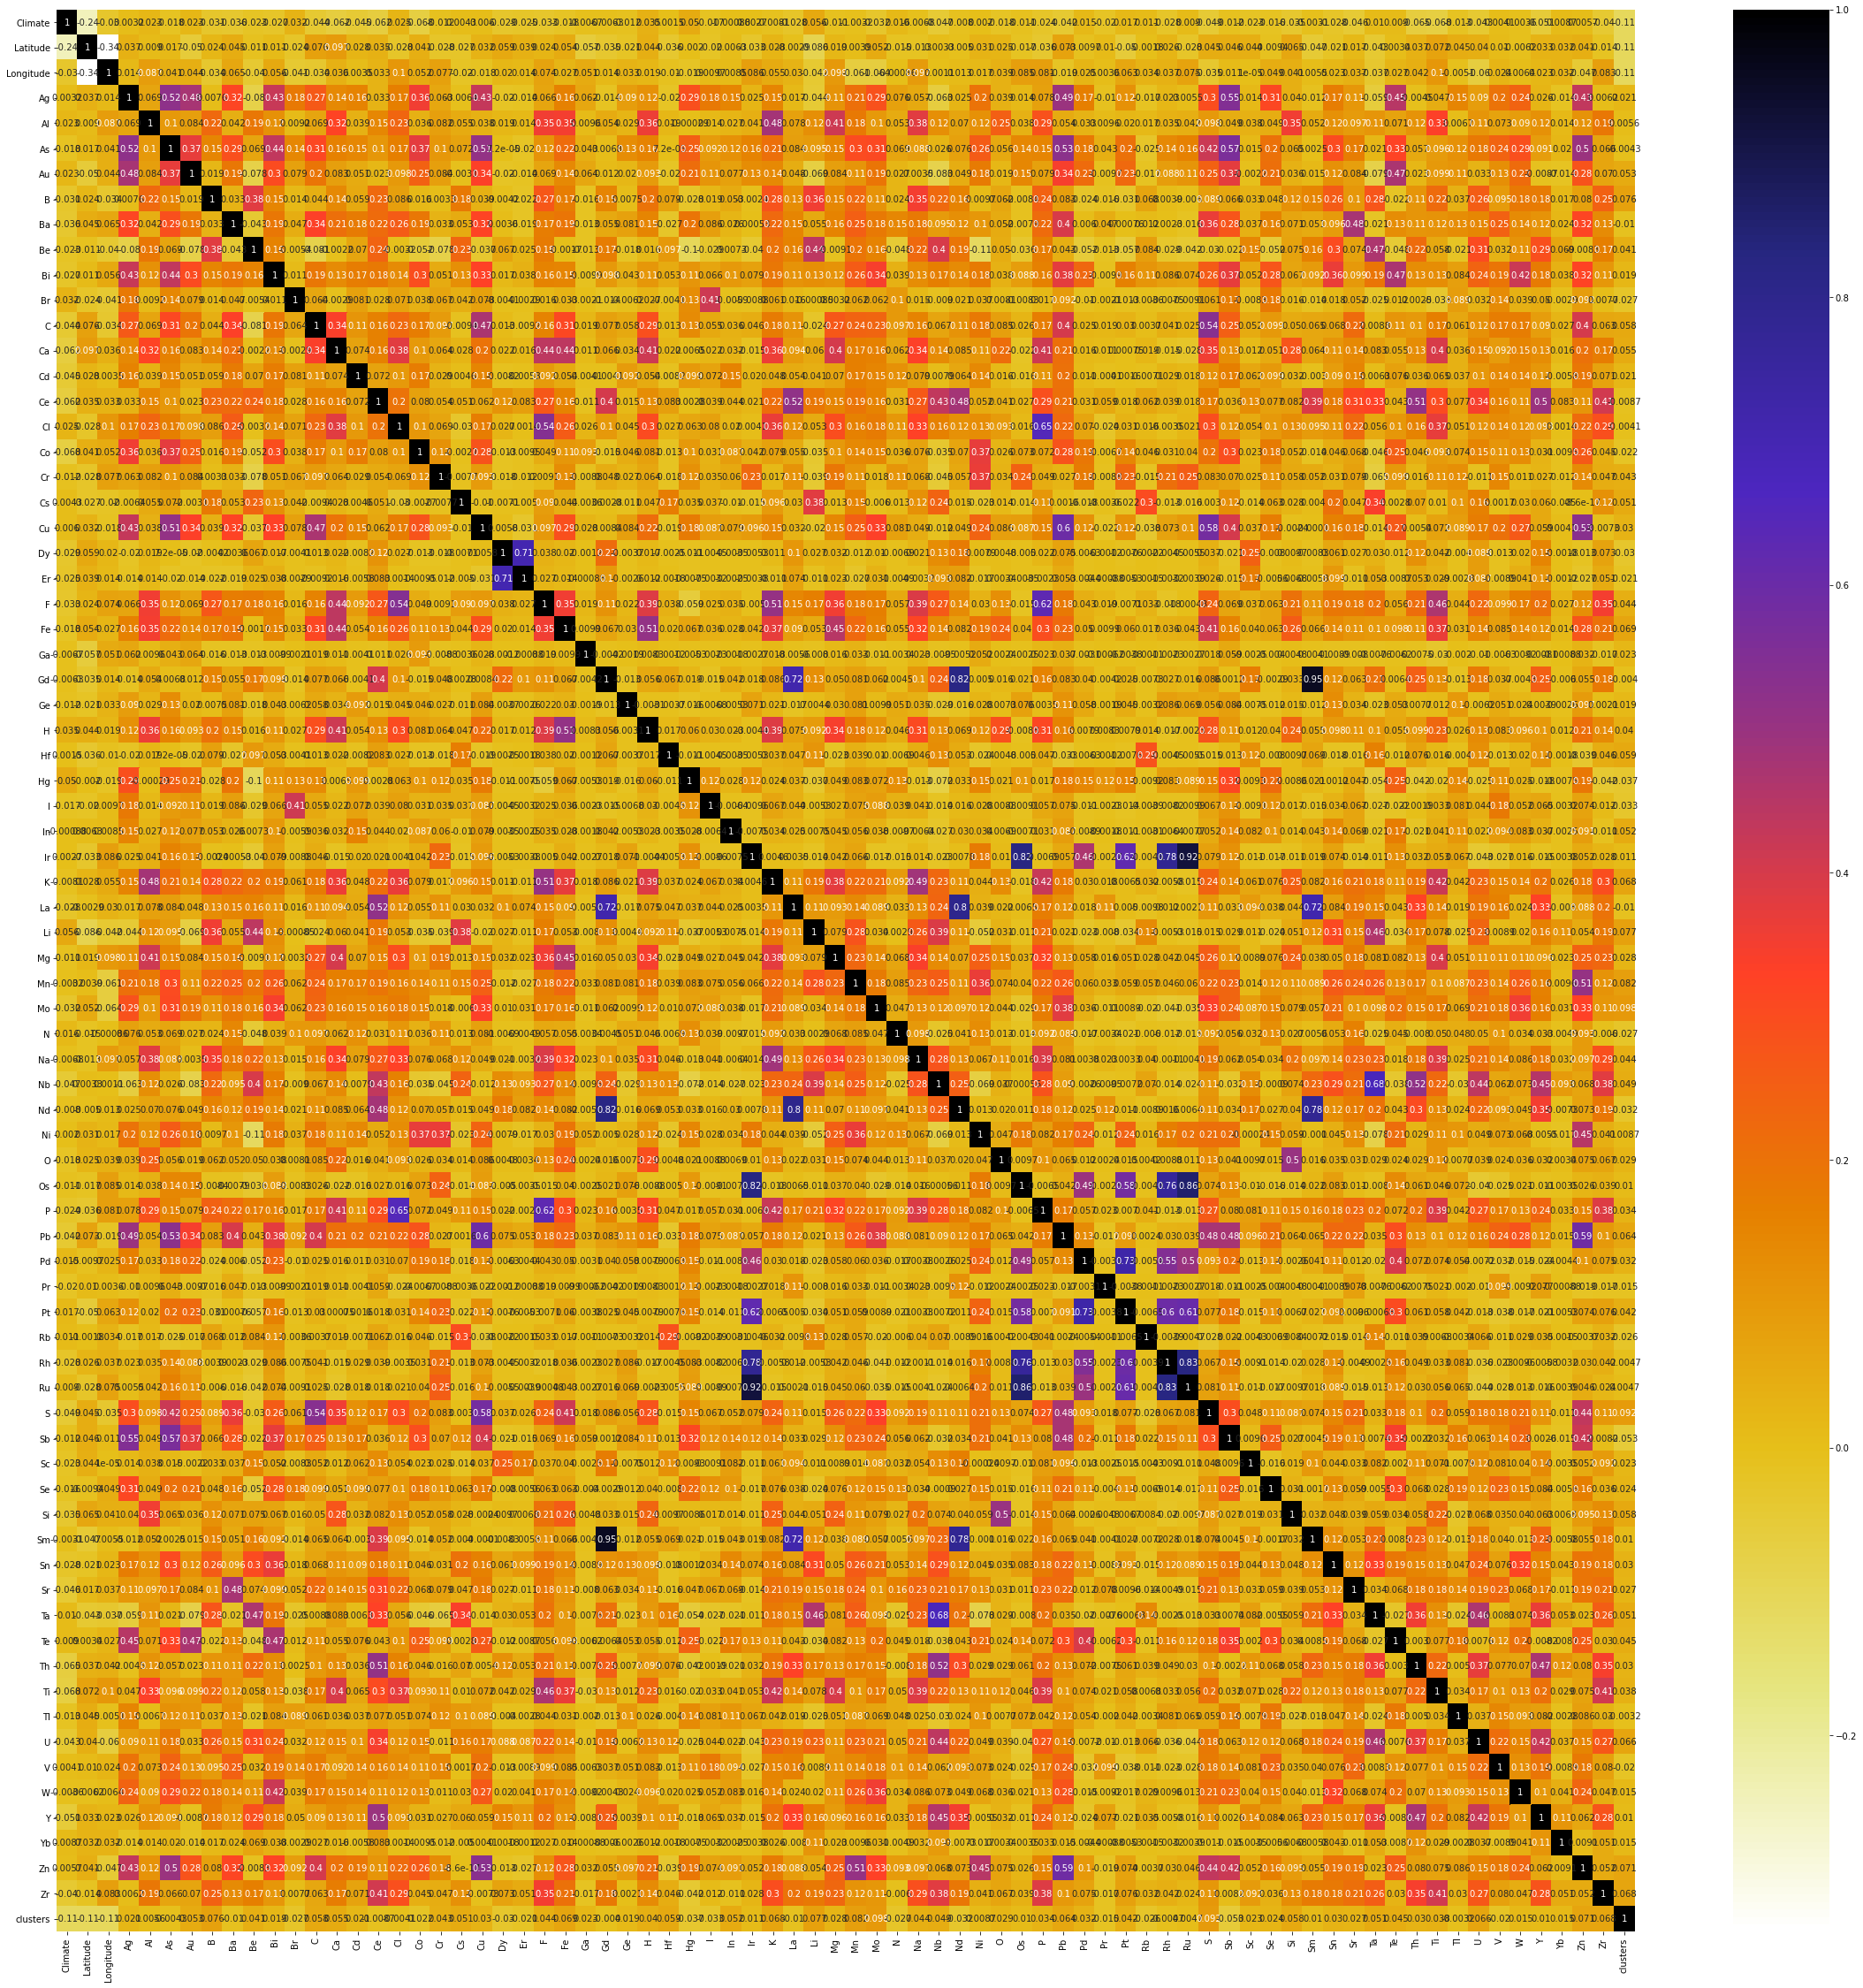

In [1155]:
# Pearson correlation
plt.figure(figsize=(40,40))
cor = dataset_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [1350]:
X

,Climate,Latitude,Longitude,Ag,Al,As,Au,B,Ba,Be,...,Th,Ti,Tl,U,V,W,Y,Yb,Zn,Zr
0,15,31.261220,35.214581,1,1,0,0,1,1,0,...,0,1,0,1,1,0,1,0,1,1
1,15,32.620121,35.014771,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,31.795924,35.211981,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
3,15,32.607559,35.289086,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,31.261220,35.214581,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,13,32.065560,-109.959440,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1604,15,33.897470,-115.462220,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1605,12,39.263610,-118.359440,1,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1606,2,35.943050,-81.910000,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [1352]:
y

0       3
1       3
2       3
3       3
4       3
       ..
1603    7
1604    7
1605    7
1606    2
1607    7
Name: clusters, Length: 1608, dtype: int32

In [1300]:
### X_test X_train
clf1 = tree.DecisionTreeClassifier(max_depth=10,min_samples_split=10)
clf2 = RandomForestClassifier(n_estimators=100, max_depth=15,min_samples_split=15)
clf3 = KNeighborsClassifier(n_neighbors=5)

algs = ["DT","RandForest","KNN"]
clfs = [clf1,clf2,clf3]
for i,clf in enumerate(clfs):
    clf.fit(X_train,y_train)
    print(algs[i])
    print("======")
    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    
    print("accuracy on train data",metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train))
    print("accuracy on test data",metrics.accuracy_score(y_true=y_test,y_pred=y_pred))
    
    print(metrics.confusion_matrix(y_test,y_pred))

DT
accuracy on train data 0.9955555555555555
accuracy on test data 0.9751552795031055
[[ 26   0   0   0   0   0   0   0]
 [  0 205   0   0   0   0   0   0]
 [  0   0  79   0   0   0   0   0]
 [  0   2   0  33   0   0   0   3]
 [  0   0   0   0  67   2   0   0]
 [  0   0   1   0   0  13   0   0]
 [  0   3   0   0   0   0  37   0]
 [  0   0   0   1   0   0   0  11]]
RandForest
accuracy on train data 0.9857777777777778
accuracy on test data 0.9606625258799172
[[ 26   0   0   0   0   0   0   0]
 [  0 205   0   0   0   0   0   0]
 [  0   0  78   0   1   0   0   0]
 [  0   5   0  32   0   0   0   1]
 [  0   0   2   0  67   0   0   0]
 [  0   0   1   0   5   7   1   0]
 [  0   2   0   0   0   0  38   0]
 [  1   0   0   0   0   0   0  11]]
KNN
accuracy on train data 0.7217777777777777
accuracy on test data 0.5548654244306418
[[ 15   5   0   5   0   0   0   1]
 [  0 177  11   0  16   1   0   0]
 [  0  28  36   0  15   0   0   0]
 [  3  14   5  15   1   0   0   0]
 [  0  39  13   1  16   0   0  

# Decision Tree Classifier has the best results

with accuracy on train data 0.9955555555555555
and accuracy on test data 0.9751552795031055

Name                                                      Amethyst
Formula                                                       SiO2
Elements                                                    O, Si 
Colours                                           Violet - purpleC
Image_url        ['/imagecache/8a/ca/03039750014946246163278.jp...
Locations        ['Afghanistan', '\xa0', 'Angola', '\xa0', 'Arg...
Locations_url    ['https://www.mindat.org//loc-404929.html', 'h...
Name: 1, dtype: object


In [ ]:
###################### Rare Stones Data

In [1412]:
X = rare_dataSet.drop(["clusters","Stone Refernced","Stone_Number"],axis=1) #feature matrix
rare_dataSet["clusters"] = KMeans(n_clusters=5, n_init=500, max_iter=1000).fit_predict(X)
y = rare_dataSet["clusters"]
X = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)
X_train.shape, X_test.shape



((93, 67), (63, 67))

In [1435]:
### X_test X_train
clf1 = tree.DecisionTreeClassifier(min_samples_split=28)
clf2 = RandomForestClassifier(n_estimators=100, max_depth=15,min_samples_split=9)
clf3 = KNeighborsClassifier(n_neighbors=5)

algs = ["DT","RandForest","NB","KNN"]
clfs = [clf1,clf2,clf3,clf4]
for i,clf in enumerate(clfs):
    clf.fit(X_train,y_train)
    print(algs[i])
    print("======")
    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    
    print("accuracy on train data",metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train))
    print("accuracy on test data",metrics.accuracy_score(y_true=y_test,y_pred=y_pred))
    
    print(metrics.confusion_matrix(y_test,y_pred))

DT
accuracy on train data 0.9032258064516129
accuracy on test data 0.8888888888888888
[[21  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0 12  0  0]
 [ 0  2  0  7  0]
 [ 5  0  0  0  0]]
RandForest
accuracy on train data 0.967741935483871
accuracy on test data 0.8253968253968254
[[16  0  3  2  0]
 [ 0 14  2  0  0]
 [ 0  0 12  0  0]
 [ 0  1  2  6  0]
 [ 0  0  1  0  4]]
NB
accuracy on train data 0.6559139784946236
accuracy on test data 0.5238095238095238
[[13  3  4  0  1]
 [ 2  8  4  1  1]
 [ 2  2  7  1  0]
 [ 1  4  1  3  0]
 [ 2  0  1  0  2]]
KNN
accuracy on train data 0.6559139784946236
accuracy on test data 0.5238095238095238
[[13  3  4  0  1]
 [ 2  8  4  1  1]
 [ 2  2  7  1  0]
 [ 1  4  1  3  0]
 [ 2  0  1  0  2]]
